### Build a recommendation system for products on an e-commerce website like Amazon.com

In [1]:
# Load the libraries 
import time
import random
import pandas as pd
import numpy as np
import Recommender as Recommender
import Evaluation as Evaluation

In [2]:
# Read the dataset

ratings = pd.read_csv('ratings_Electronics.csv')
ratings.columns = ['userID', 'ProdID', 'Rating','Timestamp']

In [3]:
ratings.count()

userID       7824481
ProdID       7824481
Rating       7824481
Timestamp    7824481
dtype: int64

In [4]:
ratings.head()

,userID,ProdID,Rating,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [5]:
ratings.drop('Timestamp',axis=1,inplace=True) # Timestamp is not useful in this modelling. Hence dropping the column.

In [6]:
ratings.isnull().any() #check for any missing values or nulls

userID    False
ProdID    False
Rating    False
dtype: bool

In [7]:
ratings['Rating'].unique()

array([5., 1., 3., 2., 4.])

In [8]:
ratings['ProdID'].unique().shape

(476001,)

In [9]:
ratings['userID'].unique().shape

(4201696,)

In [10]:
# Identifying users who have rated less than 10 products.

users=ratings.groupby('userID').count() 
user_r10=users[users['Rating']<10]
user_r10.shape

(4138521, 2)

* Almost 98% of the users have rated less than 10 products.

In [11]:
# consider users who has given 50 or more number of ratings to get a more dense dataset

users= users[users['Rating']>=50]
users.shape

(1540, 2)

### Dataset by Merging ratings with users 

In [12]:
df=pd.merge(ratings,users,on='userID')

In [13]:
df.drop(['ProdID_y','Rating_y'],axis=1,inplace=True)

In [14]:
df.columns=['userID','ProdID','Rating']

In [15]:
df.head()

,userID,ProdID,Rating
0,A3BY5KCNQZXV5U,0594451647,5.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0
2,A3BY5KCNQZXV5U,B000063574,5.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0


In [16]:
df['ProdID'].unique().shape

(48190,)

In [17]:
df.describe()

,Rating
count,125871.000000
mean,4.261339
std,1.062144
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [18]:
# Consider Products having 5 star rating for recommendation

df=df[df['Rating']==5]

In [19]:
df.shape

(71034, 3)

In [20]:
df['ProdID'].unique().shape

(32733,)

### Split-out train test dataset

In [21]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size = 0.30, random_state=0)
train_data.head(5)

,userID,ProdID,Rating
43457,A15QYHQH80W30L,B001TH7GUU,5.0
38786,A1EKSETIBS9ETQ,B0015MFTE4,5.0
67656,A7FDGFK0KN7QG,B000FA7PQ2,5.0
119228,AY3D7DG5L5WCK,B00F1CRTLK,5.0
62902,AWNJAY0M5UI70,B005KJ82KG,5.0


In [22]:
train_data.shape

(49723, 3)

### Showing the most popular Products in the dataset

In [23]:
popular_Prod=train_data.groupby('ProdID').agg({'Rating': 'count'}).reset_index()
popular_Prod.head()

,ProdID,Rating
0,0594451647,1
1,0972683275,1
2,1400501466,2
3,1400532655,1
4,1400599997,3


In [24]:
grouped_sum = popular_Prod['Rating'].sum()
popular_Prod['score']=popular_Prod['Rating']/grouped_sum

In [25]:
popular_Prod.sort_values(['Rating', 'ProdID'], ascending = [0,1]).head(10)

,ProdID,Rating,score
12920,B003ES5ZUU,108,0.002172
5635,B000N99BBC,102,0.002051
20095,B007WTAJTO,89,0.001790
11703,B002V88HFE,63,0.001267
20497,B0088CJT4U,62,0.001247
11782,B002WE6D44,60,0.001207
20293,B00829TIEK,59,0.001187
6054,B000QUUFRW,58,0.001166
12160,B0034CL2ZI,58,0.001166
15030,B004CLYEDC,58,0.001166


### Build Popularity Recommender model

In [26]:
pm = Recommender.popularity_recommender()
pm.create(train_data, 'userID', 'ProdID')

In [27]:
users=train_data['userID'].unique()
users

array(['A15QYHQH80W30L', 'A1EKSETIBS9ETQ', 'A7FDGFK0KN7QG', ...,
       'A2NXRD80LWHUOP', 'AQCJWSMSURQI2', 'A2EHYCA29NSQLU'], dtype=object)

### Top 5 Recommendations from Popularity Model

In [28]:
user_id = users[10]
pm.recommend(user_id)

,user_id,ProdID,score
12920,AY3XPKRAMKKY7,B003ES5ZUU,108
5635,AY3XPKRAMKKY7,B000N99BBC,102
20095,AY3XPKRAMKKY7,B007WTAJTO,89
11703,AY3XPKRAMKKY7,B002V88HFE,63
20497,AY3XPKRAMKKY7,B0088CJT4U,62


### Build Collaborative Filtering model

In [29]:
cm = Recommender.collaborative_recommender()
cm.create(train_data, 'userID', 'ProdID')

### Top 5 Recommendations of Collaborative model

In [30]:
user_id = users[10]
cm.recommend(user_id)

,ProdID,score
0,B00829TIA4,0.422381
1,B007WTAJTO,0.374754
2,B001TH7GUU,0.313930
3,B00829TIEK,0.312768
4,B004CLYEDC,0.286649


* For the same user (users[10]) we see the top 5 recommendations of both models
* The results are different between the popularity based and collaborative based recommendation.
* Popularity based model will return results based on the products that have rated by most number of the users.
* Collaborative based model will identify user similarities and make personalized recommendations.

### Evaluate both the models

In [40]:

start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, cm)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, cm_avg_precision_list, cm_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Number of common user_test_and_training:1536
Number of user sample:76
Getting recommendations for user:A2ED50E3KWKUKW
Getting recommendations for user:A8WEXFRWX1ZHH
Getting recommendations for user:A3O4OIBCML0683
Getting recommendations for user:A3IUW081KXD3PE
Getting recommendations for user:ABMNX856X89CS
Getting recommendations for user:A1T1YSCDW0PD25
Getting recommendations for user:A1LA4K5JF78BER
Getting recommendations for user:A2DXENZNO2JT4F
Getting recommendations for user:A1MJMYLRTZ76ZX
Getting recommendations for user:A3963R7EPE3A7E
Getting recommendations for user:A3RR2P5IS3DGPR
Getting recommendations for user:A34DQINHT6NYJU
Getting recommendations for user:A2PL06HW6KZH2
Getting recommendations for user:A2DIQTZPF26T1L
Getting recommendations for user:AW63IRQWH10GF
Getting recommendations for user:A2LFWJ8X817QGX
Getting recommendations for user:A2HV76MYH7UL3S
Getting recommendations for user:A1R377IPZOKLMM
Getting recommendations for user:A3F8T3BRXRX5P3
Getting recommendation

In [41]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()


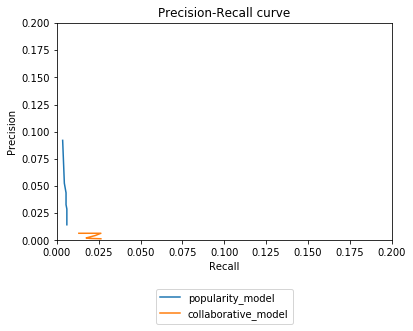

In [42]:
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      cm_avg_precision_list, cm_avg_recall_list, "collaborative_model")

* For a sample of 76 users from the larger dataset, we observe the above the precision recall curve. 
* It can observed that collaborative model can provide better recall results compared to popularity model due to personalized recommendations.